### Module 3: Dimension Reduction
Apply unsupervised learning methods to achieve dimension reduction.

In [28]:
X_train_new = train_new.drop(['Class'], axis = 1)
y_train_new = train_new.iloc[:,-1]

In [29]:
from sklearn.decomposition import PCA
model = PCA(n_components=2)
model.fit(X_train_new)
X_2D = model.transform(X_train_new)

In [30]:
print("original shape:   ", X_train_new.shape)
print("transformed shape:", X_2D.shape)

original shape:    (212593, 30)
transformed shape: (212593, 2)


We can see that the demension of the transformed data has been reduced to 2D. 

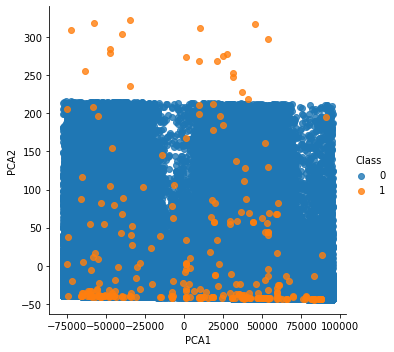

In [31]:
train_new['PCA1'] = X_2D[:, 0]
train_new['PCA2'] = X_2D[:, 1]
sns.lmplot("PCA1", "PCA2", hue = 'Class', data = train_new, fit_reg = False);

In [32]:
from sklearn.mixture import GaussianMixture
model = GaussianMixture(n_components=2, covariance_type='full')
model.fit(X_train_new)
y_gmm = model.predict(X_train_new)

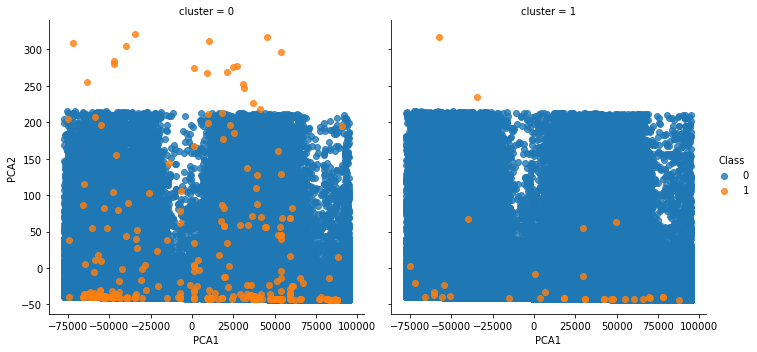

In [33]:
train_new['cluster'] = y_gmm
sns.lmplot("PCA1", "PCA2", data=train_new, hue='Class', col='cluster', fit_reg=False);

From the above graphs, we can conclude that it is difficult to separate fraud transactions from valid transactions.